<a href="https://colab.research.google.com/github/LSMISN/NSI/blob/master/Algorithmique_Terminale_diviser_pour_r%C3%A9gner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Le paradigme diviser pour régner

La méthode **« diviser pour régner »** (**divide-and-conquer** en Anglais) consiste à découper un problème en
sous-problèmes similaires (d’où l’**algorithme récursif résultant**) afin de réduire la difficulté du problème
initial. On espère casser récursivement le problème en sous-problèmes de plus en plus petits jusqu’à
obtenir des cas simples permettant une résolution directe.
L’expression provient du latin « divide ut imperes » et désignait une stratégie militaire (ou politique).
La recherche **dichotomique** dans une liste triée fournit un premier d’utilisation de cette méthode.

Méthode élaborée en 1945 par John Von Neumann

![JohnVonNeumann.png](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d6/JohnvonNeumann-LosAlamos.jpg/185px-JohnvonNeumann-LosAlamos.jpg)

[John Vonb Neumann sur Wikipedia](https://fr.wikipedia.org/wiki/John_von_Neumann)

## Les trois étapes de diviser pour régner

- **Diviser**

    découper un problème initial en sous-problèmes
- **Régner**

    résoudre les sous-problème (récursivement ou directement suivant le cas)
- **Combiner**

    Trouver une solution au problème initial à partir des solutions trouvées dans le traitement des sous-problèmes.


# Exemple 1 : recherche du minimum dans une liste de nombres


On recherche le minimum dans une liste donnée

Le principe général est le suivant :

- **Diviser**

    on divise en deux moitiés ( de taille égale ou à un élément près ) l'espace de recherche
- **Régner**

    on recherche le minimum dans chacune des parties par récursivité. La récursivité s'arrête ( cas de base ) quand on a qu'un seul élément dans la liste : le minimum est lui-même

- **Combiner**

    on compare le minimum de la partie gauche à celle de la droite


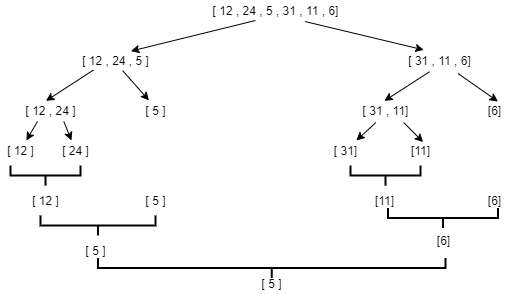

```
fonction minimum(L, indice_debut, indice_fin)
  SI indice_debut == indice_fin # Il n'y a qu'un seul élément dans la liste
  ALORS
        renvoyer L[indice_fin] # le minimum c'est lui-même
  SINON # on recherhe le minimum dans la partie gauche et dans celle de droite et on les compare    
    indice_milieu = (indice_debut + indice_fin)//2
    min_a_gauche = minimum(L, indice_début, indice_milieu)
    min_a_droite = minimum(L, indice_milieu + 1, indice_fin)    
    SI min_a_gauche < min_a_droite
    ALORS 
      retourner min_a_gauche
    SINON 
      retourner min_a_droite
```

### Exercice : implémenter et tester la fonction sur la liste maListe = [12, 24, 5, 31, 11,6]

In [ ]:
# Exercice : implémenter et tester la fonction
maListe = [12, 24, 5, 31, 11, 6]

def minimum(L, iDebut, iFin):
  """
  Recherche d'une minimum dans une liste
  par la méthode diviser pour régner
  L : liste de recherche
  iDebut : indice du premier élément de la liste L
  iFin : indice du dernier élément de la liste L
  """
  if iDebut == iFin:
      return L[iDebut]
  else:
      iMilieu = (iDebut + iFin)//2
      min_gauche = minimum(L, iDebut, iMilieu)
      min_droite = minimum(L, iMilieu+1, iFin)
      if min_gauche < min_droite:
          return min_gauche
      else:
          return min_droite

In [ ]:
assert minimum(maListe, 0, len(maListe)-1) == 5

# Exemple 2 : Tri fusion

Le principe général du tri par fusion est le suivant :

- **Diviser**

    on divise en deux moitiés ( de taille égale ou à un élément près ) la liste à trier
- **Régner**

    on trie chacune des parties par récursivité. La récursivité s'arrête ( cas de base ) lorsque les listes à trier ne sont composées que d'un seul élément (le tri est alors trivial).
- **Combiner**

    on fusionne les deux moitiés obtenues pour reconstituer la liste complète triée.

### Exemple sur de visualisation

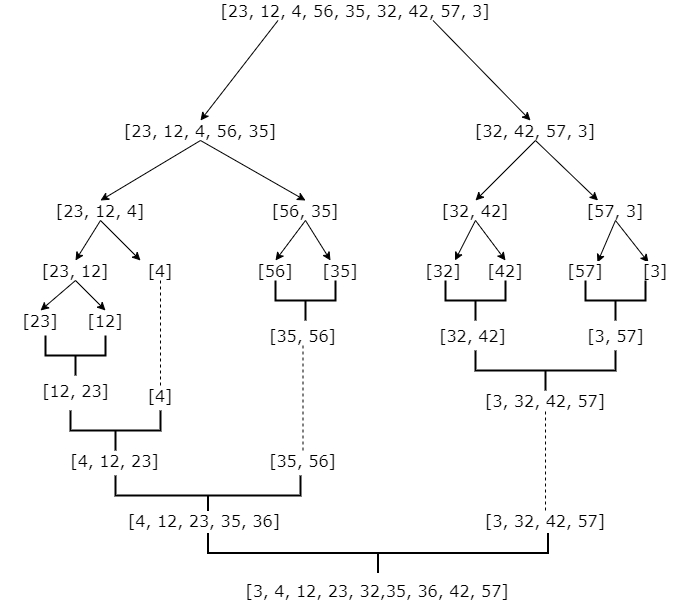

On peut décomposer le traitement en deux parties : 

 - Le tri,
 - la fusion


On va donc diviser le travail en deux fonctions, 
 - une fonction fusion

    En charge de recombiner, deux listes triées

- une fonction trifusion

    Qui effectue le trie en apppliquant diviser pour régner
    et qui utilisera la fonction fusion pour recombiner le tri des sous-parties gauche et droite.

```
fonction trifusion(L, indice_debut, indice_fin)
  SI indice_debut == indice_fin # Il n'y a qu'un seul élément dans la liste
  ALORS
        renvoyer L[indice_fin] # le minimum c'est lui-même
  SINON # on recherhe le minimum dans la partie gauche et dans celle de droite et on les compare    
    indice_milieu = (indice_debut + indice_fin)//2
    liste_triee_gauche = trifusion(L, indice_début, indice_milieu)
    liste_triee_droite = trifusion(L, indice_milieu + 1, indice_fin)    
    retourne fusion(liste_triee_gauche, liste_triee_droite)
```

```
fonction fusion(L1, L2:listes triées):
		L3 <- liste vide
		
		TANT QUE L1 non vide ET L2 non vide:
			SI L1[0] <= L2[0]:
				L3 = L3 + L1[0]
				on supprime L1[0]
			SINON:
				L3 = L3 + L2[0]
				on supprime L2[0]
			FIN_SI
		FIN_TANTQUE
		
		L3 = L3 + liste restante non-vide
		
		renvoyer L3
```

### Exercice : implémenter et tester la fonction fusion sur les listes L1 = [3, 5, 10] et L2 = [2, 4, 8, 21, 30]

In [ ]:
L1 = [3, 5, 10]
L2 = [2, 4, 8, 21, 30]

def fusion(L1, L2):
  """
  renvoie la liste triée combinaison des deux listes
  L1, L2 qui sont elles-mêmes initialement triées
  """
  L3 = []

  while len(L1) !=0 and len(L2) !=0:
    if L1[0] <= L2[0]:
      L3.append(L1.pop(0))
    else:
      L3.append(L2.pop(0))

  if len(L1) == 0:
    L3 = L3 + L2
  else:
    L3 = L3 + L1

  return L3

In [ ]:
assert fusion(L1, L2) == [2, 3, 4, 5, 8, 10, 21, 30]

### Exercice : implémenter et tester la fonction sur la liste uneListe = [23,12, 4, 56, 35, 32, 42, 57, 3]

In [ ]:
uneListe = [23,12, 4, 56, 35, 32, 42, 57, 3]

def TriFusion(L, iDebut, iFin):
  """
  renvoie la liste triée par l'algorithme
  de tri fusion de la liste L non triée
  """
  if iDebut == iFin:
    return [L[iDebut]]
  else:
    iMilieu = (iDebut + iFin)//2
    lst_trieeG = TriFusion(L, iDebut, iMilieu)
    lst_trieeD = TriFusion(L, iMilieu + 1, iFin)
    return fusion(lst_trieeG, lst_trieeD)

In [ ]:
assert TriFusion(uneListe, 0, len(uneListe)-1) == [3, 4, 12, 23, 32, 35, 42, 56, 57]

# Complexité algorithmique

L'étude de la complexité peut être faite en deux étapes.

En premier lieu, on constate qu'on divise le tableau initial de taille n en 2 tableau de taille n/2. Puis on divise de nouveau les 2 tableaux en 2, on obtient ainsi 4 tableau de taille n/4. Puis on recommence jusqu'à obtenir des tableaux de taille 1.

La question est donc combien de fois doit-on répéter l'opération de division par 2 pour réduire le tableau de taille en plusieurs tableaux de taille 1 ?

La réponse est log2(n) fois (cf. méthode dichotomique), donc une complexité en O(log(n)) pour cette partie.

*rappel: $log2(n) = ln(n)/ln(2)$*

En deuxième lieu, à chaque étape de la division, on fusionne les demi-listes. Cette étape est proportionnelle au nombre d'élément à fusionner, donc une complexité linéaire.

Ainsi, on doit effectuer au total n fois log(n) opérations pour un tableau de taille n.

La complexité asymptotique est donc en O(n.log(n)).

Cette complexité est plus intéressante que celle des tri par insertion ou par sélection qui était en O(n²). 

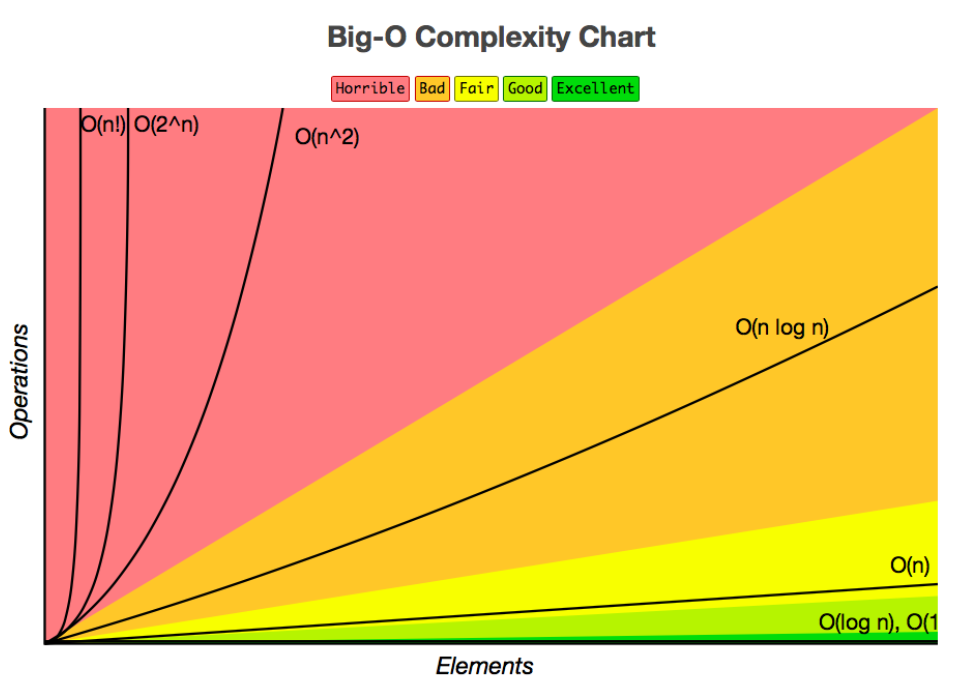

Quelques valeurs de temps d'exécution de 2 algorithmes de tri en fonction de la taille n du tableau à trier.

|  nombre d'éléments n | Tri par sélection | Tri par fusion |
|:-:     |:-:      |:-:    |
| 100    | 0.006s  | 0.006s|
| 1000   | 0.069s  | 0.010s|
| 10 000 | 2.162s  | 0.165s|
| 20 000 | 7.56s   | 0.326s|
| 40 000 | 28.682s | 0.541s|

## Exercice : En vous inspirant de l'algorithme et du code précédent sur la recherche du minimum dans une liste, écrire le code de la fonction maximum qui trouve la plus grande valeur d'une liste passée en argument en appliquant le paradigme diviser pour régner 

In [ ]:
uneAutreListe = [23, 12, 4, 1, 75, 56, 35, 32, 42, 57, 3]

# écrire le code de la fonction maximum

In [ ]:
assert maximum(uneAutreListe, 0, len(uneAutreListe)-1) == 75